In [15]:
# Code to get all the Posterior mean (95% Equal-tail CI) (95% HPD CI) HPD-CI-width from ./xenarthra_mcmc_out.txt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


# Read the file
file = open("LG_G4_C60_m12_out.txt", "r")
lines = file.readlines()
file.close()

# Extract the data
data = []
mu_data = []
var_data = []

read_flag = False
for line in lines:
    if line.startswith("Posterior"):
        read_flag = True
    if read_flag and line.startswith("t"):
        data.append(line)
    if read_flag and line.startswith("mu"):
        mu_data.append(line)
    if read_flag and line.startswith("sigma"):
        var_data.append(line)

In [16]:
data

['t_n55          8.7871 ( 7.7807, 10.2575) ( 7.6545, 10.0431)  2.3887 (Jnode 106)\n',
 't_n56          8.4954 ( 7.6364,  9.6950) ( 7.5587,  9.5698)  2.0112 (Jnode 105)\n',
 't_n57          8.0229 ( 7.2653,  9.0864) ( 7.2200,  9.0107)  1.7906 (Jnode 104)\n',
 't_n58          6.8547 ( 6.3637,  7.6534) ( 6.3142,  7.5637)  1.2495 (Jnode 103)\n',
 't_n59          6.6413 ( 6.1758,  7.4107) ( 6.1296,  7.3210)  1.1915 (Jnode 102)\n',
 't_n60          6.3423 ( 5.8988,  7.0752) ( 5.8603,  6.9956)  1.1354 (Jnode 101)\n',
 't_n61          5.8861 ( 5.4473,  6.5775) ( 5.4175,  6.5139)  1.0963 (Jnode 100)\n',
 't_n62          2.5215 ( 1.6453,  3.4257) ( 1.6230,  3.4008)  1.7778 (Jnode 99)\n',
 't_n63          3.9925 ( 3.2804,  4.7156) ( 3.2833,  4.7162)  1.4329 (Jnode 98)\n',
 't_n64          2.7993 ( 2.1769,  3.4632) ( 2.1677,  3.4522)  1.2844 (Jnode 97)\n',
 't_n65          2.4541 ( 1.8836,  3.0784) ( 1.8650,  3.0536)  1.1886 (Jnode 96)\n',
 't_n66          1.8850 ( 1.4121,  2.4243) ( 1.3929,  2.39

In [17]:
node_name = []
posterior_mean_iqtree = []
posterior_mean_baseml = []

posterior_mean_mu_iqtree = []
posterior_mean_mu_baseml = []

posterior_mean_var_iqtree = []
posterior_mean_var_baseml = []

lower_ci_iqtree = []
upper_ci_iqtree = []

lower_ci_mu_iqtree = []
upper_ci_mu_iqtree = []

lower_ci_var_iqtree = []
upper_ci_var_iqtree = []

# Credible intervals for McmcDate
lower_ci_baseml = []
upper_ci_baseml = []

lower_ci_mu_baseml = []
upper_ci_mu_baseml = []

lower_ci_var_baseml = []
upper_ci_var_baseml = []

In [18]:
for line in data:
    line = line.strip().split()
    node_name.append(line[0])
    posterior_mean_iqtree.append(float(line[1]))
#     if line[3].startswith('('):
#         lower_ci_iqtree.append(float(line[3][1:-1]))
#     else:
#         lower_ci_iqtree.append(float(line[3][1:-1]))
#     if line[4].startswith('('):
#         upper_ci_iqtree.append(float(line[4][1:-1]))
#     else:
#         upper_ci_iqtree.append(float(line[4][:-1]))
#     # posterior_mean_baseml.append(float(line[4]))
#     # lower_ci_baseml.append(float(line[5]))
#     # upper_ci_baseml.append(float(line[6]))
# 
# for line in mu_data:
#     line = line.strip().split()
#     # node_name.append(line[0])
#     posterior_mean_mu_iqtree.append(float(line[1]))
#     lower_ci_mu_iqtree.append(float(line[3][:-1]))
#     upper_ci_mu_iqtree.append(float(line[4][:-1]))
#
# for line in var_data:
#     line = line.strip().split()
#     # node_name.append(line[0])
#     posterior_mean_var_iqtree.append(float(line[1]))
#     lower_ci_var_iqtree.append(float(line[3][:-1]))
#     upper_ci_var_iqtree.append(float(line[4][:-1]))

In [19]:
node_name

['t_n55',
 't_n56',
 't_n57',
 't_n58',
 't_n59',
 't_n60',
 't_n61',
 't_n62',
 't_n63',
 't_n64',
 't_n65',
 't_n66',
 't_n67',
 't_n68',
 't_n69',
 't_n70',
 't_n71',
 't_n72',
 't_n73',
 't_n74',
 't_n75',
 't_n76',
 't_n77',
 't_n78',
 't_n79',
 't_n80',
 't_n81',
 't_n82',
 't_n83',
 't_n84',
 't_n85',
 't_n86',
 't_n87',
 't_n88',
 't_n89',
 't_n90',
 't_n91',
 't_n92',
 't_n93',
 't_n94',
 't_n95',
 't_n96',
 't_n97',
 't_n98',
 't_n99',
 't_n100',
 't_n101',
 't_n102',
 't_n103',
 't_n104',
 't_n105',
 't_n106',
 't_n107']

In [20]:
posterior_mean_iqtree

[8.7871,
 8.4954,
 8.0229,
 6.8547,
 6.6413,
 6.3423,
 5.8861,
 2.5215,
 3.9925,
 2.7993,
 2.4541,
 1.885,
 1.2623,
 0.8365,
 0.3579,
 2.9361,
 6.4851,
 6.2916,
 5.8741,
 4.0916,
 3.6592,
 3.1502,
 6.2839,
 5.996,
 5.8034,
 5.4272,
 4.9629,
 4.823,
 4.1651,
 3.7811,
 3.4562,
 2.5547,
 2.3558,
 4.1972,
 3.3643,
 6.1673,
 1.2434,
 6.0309,
 5.6421,
 4.9982,
 4.6346,
 3.3623,
 3.8723,
 4.7976,
 4.6243,
 4.3094,
 3.0767,
 4.1575,
 7.2729,
 5.4399,
 3.304,
 2.4155,
 6.0984]

In [21]:
lower_ci_iqtree

[]

In [22]:
upper_ci_iqtree

[]

In [23]:
file_LG = open("LG_m12_out.txt", "r")
lines1 = file_LG.readlines()
file_LG.close()

# Extract the data
data1 = []
mu_data1 = []
var_data1 = []

read_flag = False
for line in lines1:
    if line.startswith("Posterior"):
        read_flag = True
    if read_flag and line.startswith("t"):
        data1.append(line)
    if read_flag and line.startswith("mu"):
        mu_data1.append(line)
    if read_flag and line.startswith("sigma"):
        var_data1.append(line)

        
for line in data1:
    line = line.strip().split()
    # node_name.append(line[0])
    posterior_mean_baseml.append(float(line[1]))
#     if line[3].startswith('('):
#         lower_ci_baseml.append(float(line[3][1:-1]))
#     else:
#          lower_ci_baseml.append(float(line[3][:-1]))
#     if line[4].startswith('('):
#         upper_ci_baseml.append(float(line[4][1:-1]))
#     else:
#          upper_ci_baseml.append(float(line[4][:-1]))
#         
#     
# for line in mu_data1:
#     line = line.strip().split()
#     # node_name.append(line[0])
#     posterior_mean_mu_baseml.append(float(line[1]))
#     lower_ci_mu_baseml.append(float(line[3][:-1]))
#     upper_ci_mu_baseml.append(float(line[4][:-1]))
    
# for line in var_data1:
#     line = line.strip().split()
#     # node_name.append(line[0])
#     posterior_mean_var_baseml.append(float(line[1]))
#     lower_ci_var_baseml.append(float(line[3][:-1]))
#     upper_ci_var_baseml.append(float(line[4][:-1]))

In [24]:
import matplotlib.pyplot as plt
import numpy as np

# # Example data
# # Posterior means for MCMCtree (x-axis) and McmcDate (y-axis)
# posterior_mean_mcmctree = [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]
# posterior_mean_mcmcdate = [110, 210, 310, 410, 510, 610, 710, 810, 910, 1010]
# 
# # Credible intervals for MCMCtree
# lower_ci_mcmctree = [90, 180, 270, 360, 450, 540, 630, 720, 810, 900]
# upper_ci_mcmctree = [110, 220, 330, 440, 550, 660, 770, 880, 990, 1100]
# 
# # Credible intervals for McmcDate
# lower_ci_mcmcdate = [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]
# upper_ci_mcmcdate = [120, 220, 320, 420, 520, 620, 720, 820, 920, 1020]

# Calculate error bars
# xerr = [np.array(lower_ci_baseml), 
#         np.array(upper_ci_baseml)]
# yerr = [np.array(lower_ci_iqtree), 
#         np.array(upper_ci_iqtree)]
# 
# # Plotting
# fig, ax = plt.subplots(figsize=(15, 15))
# ax.plot([-0.1,90], 
#         [-0.1, 90], 
#         'k--', label='y=x')
# ax.errorbar(posterior_mean_baseml, posterior_mean_iqtree, 
#             xerr=xerr, yerr=yerr, fmt='*', ecolor='r', capsize=3, label='95% HPD CI')
# 
# # Labels and title
# ax.set_xlabel('Posterior mean age LG [100 Mya]', fontsize=18)
# ax.set_ylabel('Posterior mean age LG+G4 [100 Mya]', fontsize=18)
# ax.set_title('Posterior mean age comparison between LG and LG+G4 models [t116 ~ B(1.25,2.482)]')
# ax.legend()
# 
# # Show plot
# # plt.show()
# plt.savefig('./animal_origin_posterior_mean_age_comparison_LG_G4_c11.png')

In [25]:
posterior_mean_baseml

[10.4071,
 10.0825,
 8.9723,
 7.5331,
 7.1233,
 6.6275,
 5.9185,
 2.8393,
 4.164,
 2.9261,
 2.4561,
 1.8359,
 1.2109,
 0.7995,
 0.3408,
 3.0726,
 6.7123,
 5.5408,
 5.9417,
 4.2225,
 3.5784,
 3.4425,
 6.7307,
 6.2256,
 5.8791,
 5.4459,
 4.9033,
 4.6274,
 3.9087,
 3.4407,
 3.015,
 2.2395,
 1.8995,
 4.079,
 3.1712,
 6.4731,
 1.6826,
 6.1906,
 5.626,
 4.8234,
 4.2962,
 3.0824,
 3.3239,
 4.6631,
 4.2394,
 3.5785,
 3.0751,
 4.0306,
 7.9028,
 5.9089,
 3.6065,
 3.1764,
 7.493]

In [26]:
posterior_mean_iqtree

[8.7871,
 8.4954,
 8.0229,
 6.8547,
 6.6413,
 6.3423,
 5.8861,
 2.5215,
 3.9925,
 2.7993,
 2.4541,
 1.885,
 1.2623,
 0.8365,
 0.3579,
 2.9361,
 6.4851,
 6.2916,
 5.8741,
 4.0916,
 3.6592,
 3.1502,
 6.2839,
 5.996,
 5.8034,
 5.4272,
 4.9629,
 4.823,
 4.1651,
 3.7811,
 3.4562,
 2.5547,
 2.3558,
 4.1972,
 3.3643,
 6.1673,
 1.2434,
 6.0309,
 5.6421,
 4.9982,
 4.6346,
 3.3623,
 3.8723,
 4.7976,
 4.6243,
 4.3094,
 3.0767,
 4.1575,
 7.2729,
 5.4399,
 3.304,
 2.4155,
 6.0984]

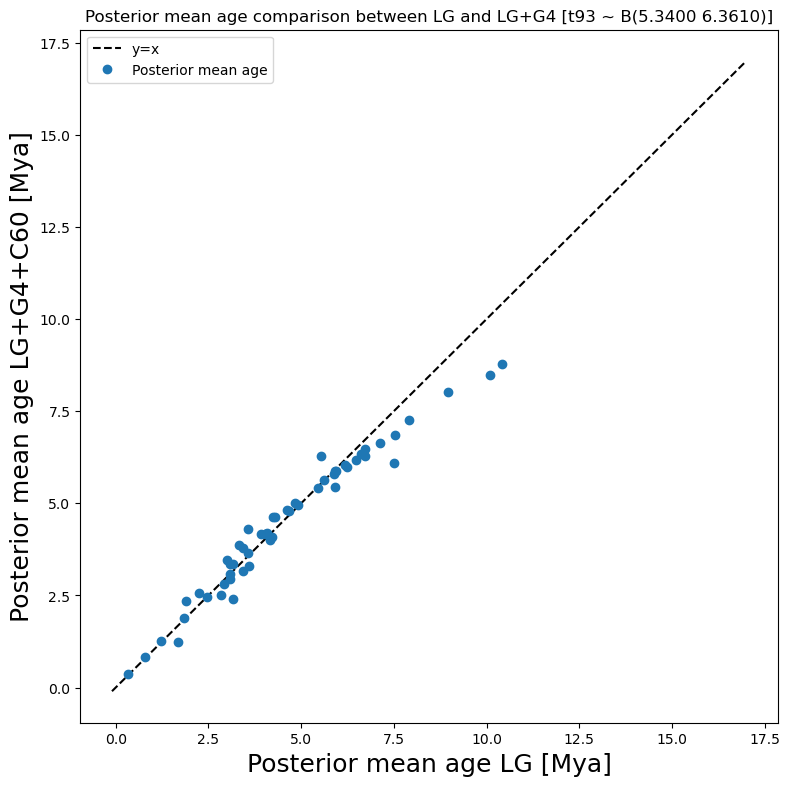

In [27]:
# Calculate error bars
xerr = [np.array(lower_ci_baseml), 
        np.array(upper_ci_baseml)]
yerr = [np.array(lower_ci_iqtree), 
        np.array(upper_ci_iqtree)]

# Plotting
fig, ax = plt.subplots(figsize=(9 ,9))
ax.plot([-0.1,17], 
        [-0.1, 17], 
        'k--', label='y=x')
ax.plot(posterior_mean_baseml, posterior_mean_iqtree, 'o', label='Posterior mean age')
 
# Labels and title
ax.set_xlabel('Posterior mean age LG [Mya]', fontsize=18)
ax.set_ylabel('Posterior mean age LG+G4+C60 [Mya]', fontsize=18)
ax.set_title('Posterior mean age comparison between LG and LG+G4 [t93 ~ B(5.3400 6.3610)]')
ax.legend()

# point_x = posterior_mean_baseml[0]  # Example: first point in the list
# point_y = posterior_mean_iqtree[0]  # Example: first point in the list
# ax.annotate('Root age', xy=(point_x, point_y), xytext=(point_x - 0.1, point_y - 0.1), color='red')
# Show plot
# plt.show()
plt.savefig('./metazoa_posterior_mean_age_comparison_LG_G4_C60_m12_scatter.png')

In [28]:
# fig, ax = plt.subplots(figsize=(9 ,9))
# ax.plot([0.01,0.04], 
#         [0.01, 0.04], 
#         'k--', label='y=x')
# ax.plot(posterior_mean_mu_baseml, posterior_mean_mu_iqtree, 'o', label='Posterior mean rates for partitions')
#  
# # Labels and title
# ax.set_xlabel('Posterior mean rate [LG]', fontsize=18)
# ax.set_ylabel('Posterior mean rate [LG+G4]', fontsize=18)
# ax.set_title('Posterior mean rate comparison between LG and LG+G4 [Cherry only calibration/IQ-TREE]')
# ax.legend()
# 
# # point_x = posterior_mean_baseml[0]  # Example: first point in the list
# # point_y = posterior_mean_iqtree[0]  # Example: first point in the list
# # ax.annotate('Root age', xy=(point_x, point_y), xytext=(point_x - 0.1, point_y - 0.1), color='red')
# # Show plot
# # plt.show()
# plt.savefig('./animal_origin__posterior_mean_rate_comparison_LG_G4_all_scatter.png')